In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds #para descargar el set de datos de zalando

In [ ]:
#https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=es-419
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
#nombre_clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
nombres_clases = metadatos.features['label'].names

In [ ]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Normalizar los datos (Pasar de 0-255 a 0-1)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas


#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache(usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


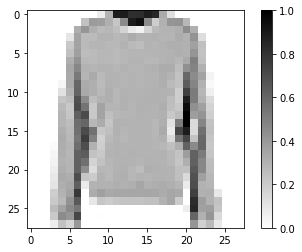

In [ ]:
#Mostrar una imagen de los datos de pruebas, de momento mostremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))#Redimensionar, cosas de tensores, lo veremos despues
  

import matplotlib.pyplot as plt

#Dibujar 
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

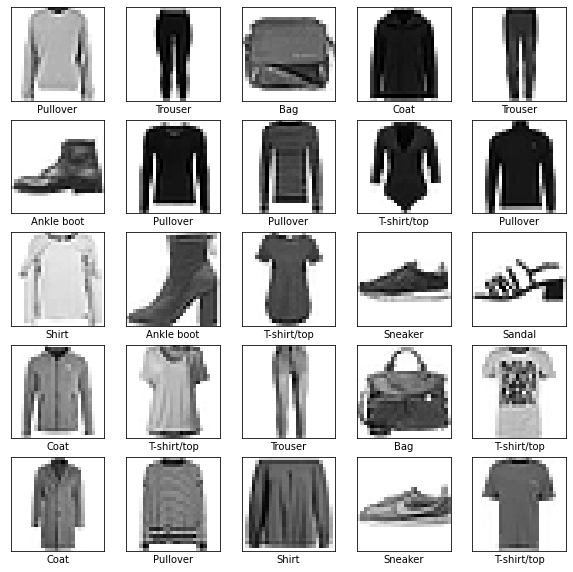

In [ ]:
#mostramos las imagenes con la categoria que viene etiquetada
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
#Crear el modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),#1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax), #Para redes de clasificacion
])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
num_eje_entrenamiento = metadatos.splits["train"].num_examples
num_eje_pruebas = metadatos.splits["test"].num_examples
print(num_eje_entrenamiento)
print(num_eje_pruebas)

60000
10000


In [ ]:
#para que la red entrene mas rapido le decimos que lo haga por lotes
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_eje_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch =math.ceil(num_eje_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5306 - accuracy: 0.8138
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3541 - accuracy: 0.8696
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.8764
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8832


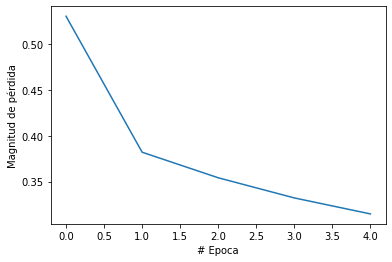

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
#Exportar el modelo en formato h5
modelo.save('modelo_exportado.h5')

In [ ]:
#Colab trabaja en base a linux, por lo cual podemos utilizar comandos de dicho sistema
!ls #muestra arcivhos y directorios

'~'   modelo_exportado.h5   sample_data


In [ ]:
#Instalar tensorflowjs para convertir el h5 a un modelo que pueda cargar tensorflowjs en un explorador
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Convertir el archivo h5 a formato de tensorflowjs
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras modelo_exportado.h5 carpeta_salida

In [ ]:
#Veamos si si creo la carpeta
!ls

'~'   carpeta_salida   modelo_exportado.h5   sample_data


In [ ]:
#Veamos el contenido de la carpeta
!ls carpeta_salida

group1-shard1of1.bin  model.json
